# Employee salary prediction based on employee experience.



### Import the basic required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as ms
%matplotlib inline

### Importing the dataset

In [2]:
data = pd.read_csv('Salary_Data.csv')

### Analyze Data

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.shape

(30, 2)

In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Visualization of the Data


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


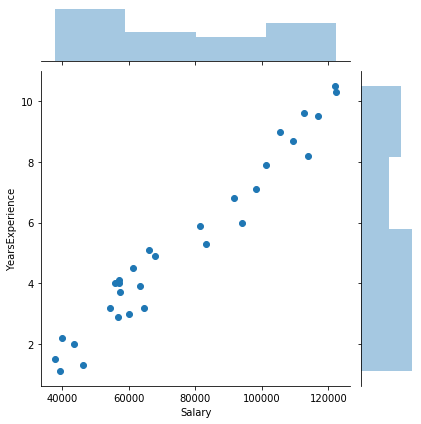

In [10]:
sns.jointplot(x='Salary',y='YearsExperience',data=data)

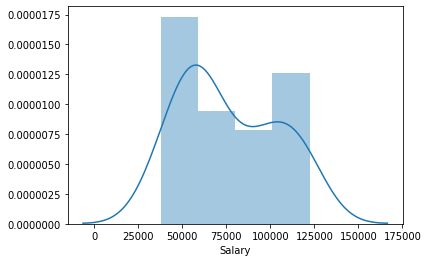

In [11]:
sns.distplot(data['Salary'])

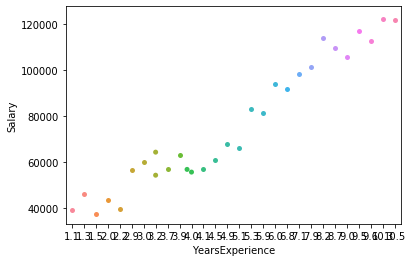

In [12]:
sns.swarmplot(y='Salary',x='YearsExperience',data=data)

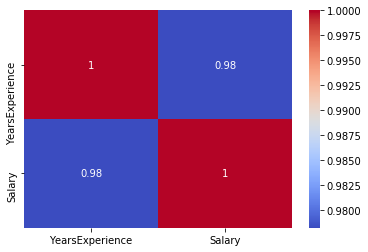

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

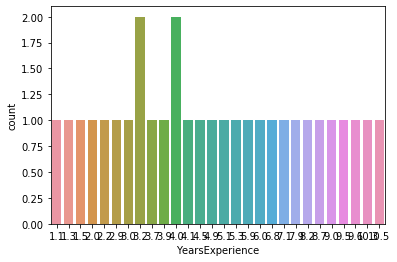

In [14]:
sns.countplot(data['YearsExperience'])

## Cleaning Data

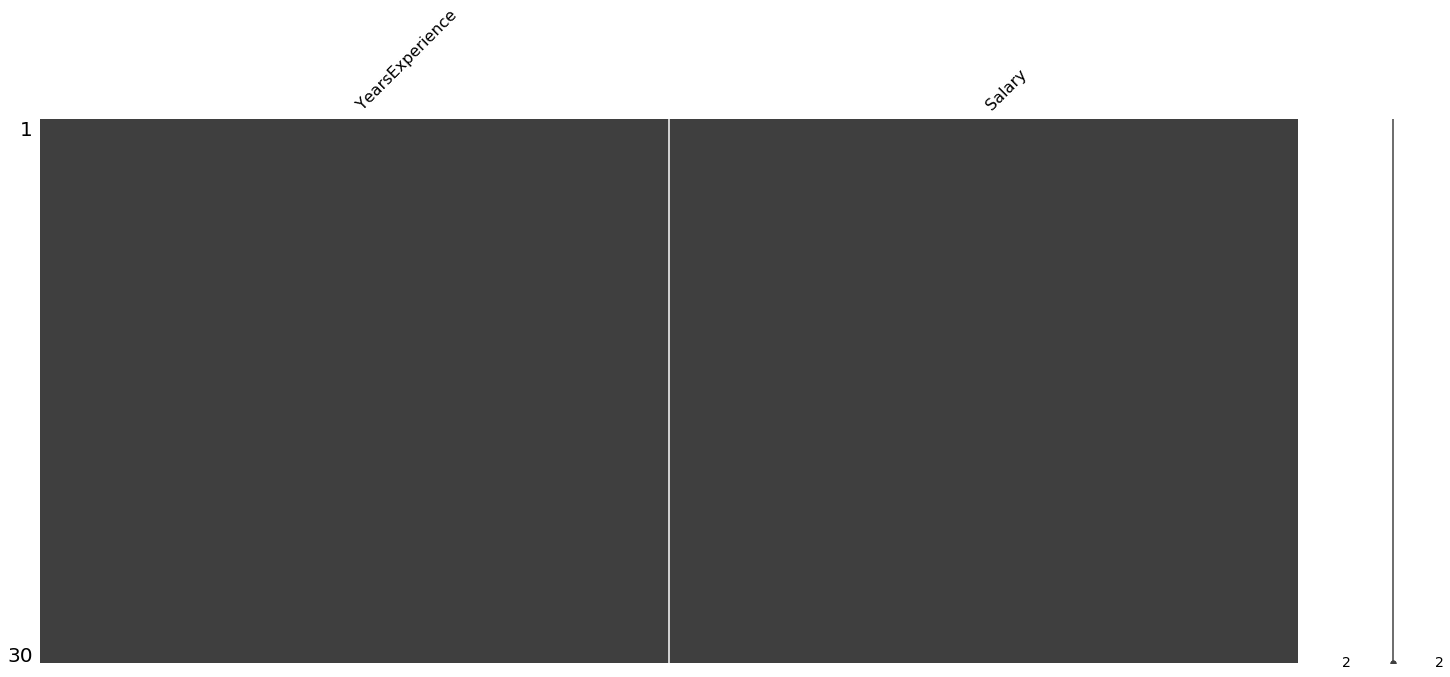

In [15]:
ms.matrix(data)

The dataset does not have the null values

## Categorical value conversion

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Here we don't need to convert the data.

## Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Salary',axis=1),data['Salary'],test_size=1/3,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the model on the test

In [22]:

Y_pred_test = regressor.predict(X_test)

In [23]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Visualizing the Results

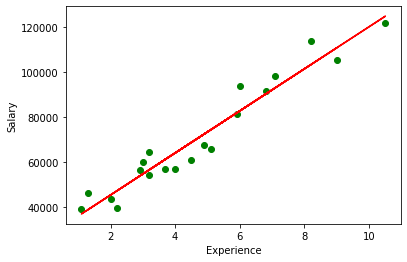

In [26]:
plt.scatter(X_train,Y_train,color="green")
plt.plot(X_train,regressor.predict(X_train),color="Red")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

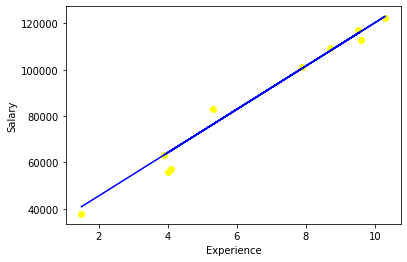

In [27]:
plt.scatter(X_test,Y_test,color="Yellow")
plt.plot(X_test,Y_pred_test,color="Blue")
plt.ylabel("Salary")
plt.xlabel("Experience")
plt.show()

### Predicting a new result

In [28]:
print(regressor.predict([[5]]))

[73545.90445964]


### Intercept and Coefficients

In [29]:
regressor.intercept_

26816.19224403119

In [30]:
regressor.coef_

array([9345.94244312])

### R-square score

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(Y_test,Y_pred_test)

0.9749154407708353